# **OBJECTIVE:**
### To predict the optimum number of clusters and represent them visually.

In [ ]:
# importing libraries to mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
pd.set_option("max_rows", 500)

# **1. Reading and Understanding Data**

In [ ]:
# Reading the iris dataset
df_iris = pd.read_csv('gdrive/MyDrive/Iris.csv')

In [ ]:
# Observing the iris dataset
df_iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Inspecting the dataset to check the datatypes and missing values
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### There seems no missing values in the above dataset.

# **2. Univariate Analysis and Outlier Handling**

In [ ]:
# Check the column names
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

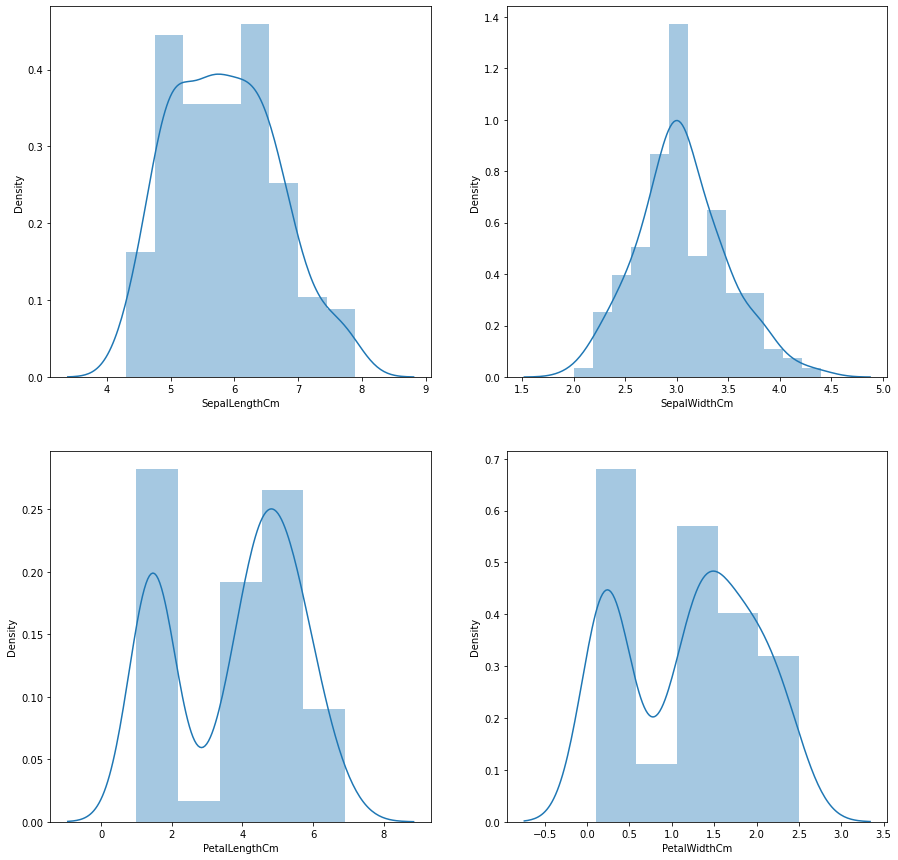

In [ ]:
# plotting histogram to check the column which gives more information and form good clusters
plt.figure(figsize=(15,15))
parameters = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in enumerate(parameters):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df_iris[i[1]])

#### From the histograms we can come to the conclusion that the columns PetalLengthCm and PetalWidthCm can form good clusters because they show discriminative ranges of values and are informative.

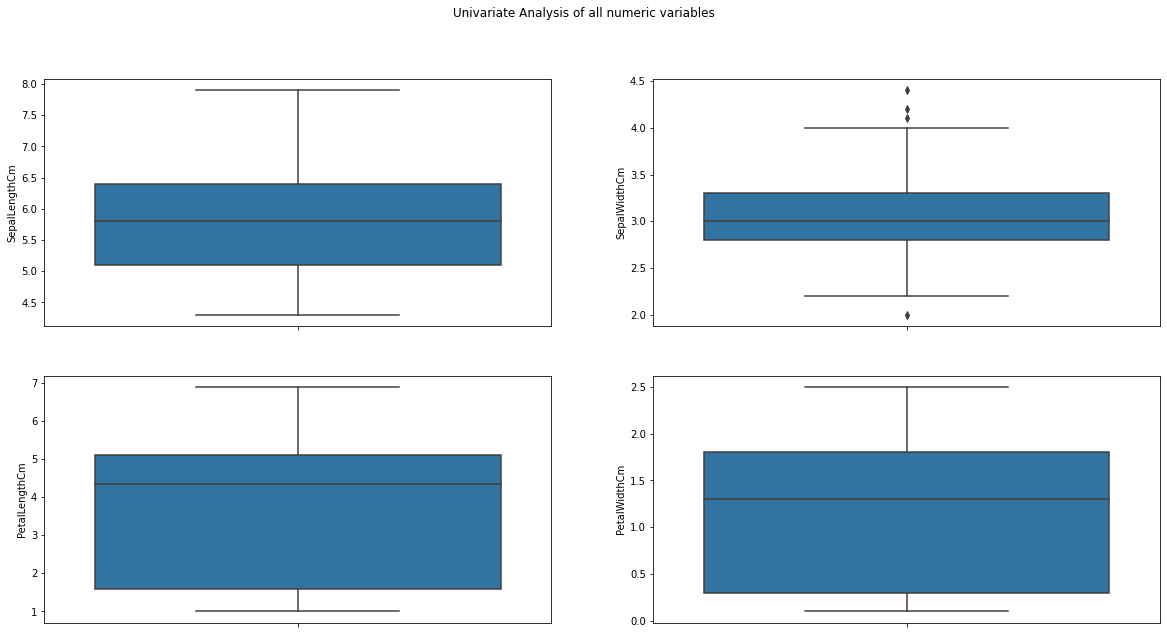

In [ ]:
# Univariate Analysis of numerical variables with outlier handling
# SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm
plt.figure(figsize =(20, 10))
plt.suptitle("Univariate Analysis of all numeric variables")

plt.subplot(2,2,1)
sns.boxplot(y=df_iris['SepalLengthCm'])


plt.subplot(2,2,2)
sns.boxplot(y=df_iris['SepalWidthCm'])


plt.subplot(2,2,3)
sns.boxplot(y=df_iris['PetalLengthCm'])


plt.subplot(2,2,4)
sns.boxplot(y=df_iris['PetalWidthCm'])



plt.show()

#### We can see that the column, SepalWidthCm has outliers so we have to treat them because the prerequisite of K-Means algorithm is that the data must not have outliers.

- We will use capping for treating the outliers.
- Removing outliers from the SepalWidthCm column
- capping to 0.01-0.99 values to avoid harsh outlier treatment because if we do harsh outlier treatment using Q3+1.5xIQR for outliers above upper whisker and Q1-1.5xIQR for outliers below lower whisker we may loose a lot of data.

In [ ]:
# Treating outliers of column SepalWidthCm
q1_iris = df_iris['SepalWidthCm'].quantile(0.01)
q4_iris = df_iris['SepalWidthCm'].quantile(0.99)

In [ ]:
df_iris['SepalWidthCm'][df_iris['SepalWidthCm']<=q1_iris] = q1_iris

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_iris['SepalWidthCm'][df_iris['SepalWidthCm']>=q4_iris] = q4_iris

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


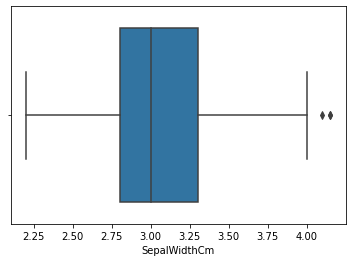

In [ ]:
sns.boxplot('SepalWidthCm', data = df_iris)
plt.show()

## We can ignore those two outliers as capping them will lead to a huge amount of garbage value which we don't want.

# **3. Bivariate or Multivariate Analysis**

In [ ]:
# viewing correlation in numbers
df_iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.400704,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.113797,0.871754,0.817954
SepalWidthCm,-0.400704,-0.113797,1.000000,-0.423418,-0.359451
PetalLengthCm,0.882747,0.871754,-0.423418,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.359451,0.962757,1.000000


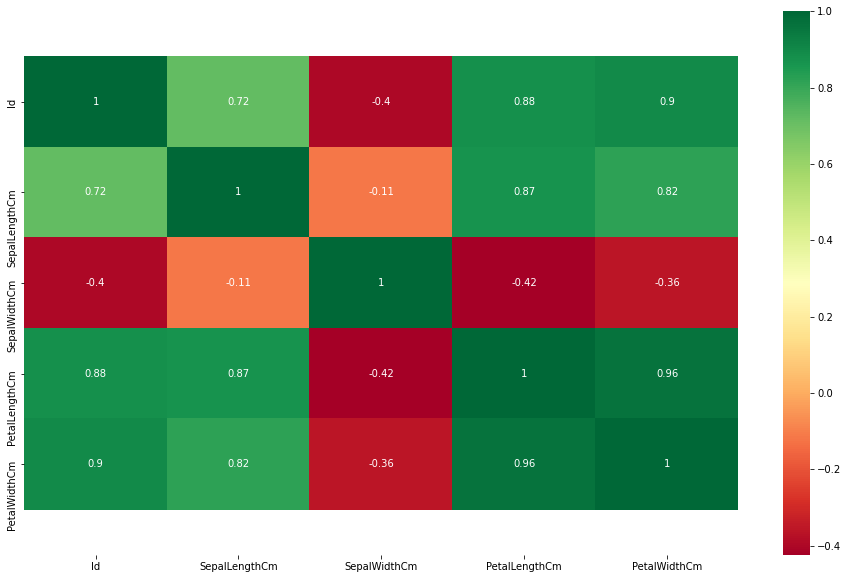

In [ ]:
#viewing correlation in heatmaps
plt.figure(figsize = (16, 10))
ax=sns.heatmap(df_iris.corr(), annot = True, cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

#### Though removing high correlation variables is not a prerequisite of the clustering algorithms still we can observe and predict the nature of the graphs whether they will be positively correlated or negatively correlated by observing the above correlation matrix.

# **4. Data Preparation**

In [ ]:
# making a copy of the existing dataframe in another variable
df_iris_copy = df_iris.copy()

In [ ]:
# Inspecting to check the unique column
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.500,1.4,0.2,Iris-setosa
1,2,4.9,3.000,1.4,0.2,Iris-setosa
2,3,4.7,3.200,1.3,0.2,Iris-setosa
3,4,4.6,3.100,1.5,0.2,Iris-setosa
4,5,5.0,3.600,1.4,0.2,Iris-setosa
5,6,5.4,3.900,1.7,0.4,Iris-setosa
6,7,4.6,3.400,1.4,0.3,Iris-setosa
7,8,5.0,3.400,1.5,0.2,Iris-setosa
8,9,4.4,2.900,1.4,0.2,Iris-setosa
9,10,4.9,3.100,1.5,0.1,Iris-setosa


In [ ]:
# Create dummy variables out of Species column
df_iris['Species']=pd.get_dummies(df_iris['Species'], drop_first=True)

In [ ]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.500,1.4,0.2,0
1,2,4.9,3.000,1.4,0.2,0
2,3,4.7,3.200,1.3,0.2,0
3,4,4.6,3.100,1.5,0.2,0
4,5,5.0,3.600,1.4,0.2,0
5,6,5.4,3.900,1.7,0.4,0
6,7,4.6,3.400,1.4,0.3,0
7,8,5.0,3.400,1.5,0.2,0
8,9,4.4,2.900,1.4,0.2,0
9,10,4.9,3.100,1.5,0.1,0


In [ ]:
# Dropping the column having unique values which act as identifiers (here id column is acting as identifier)
df_iris.drop('Id', axis=1, inplace=True)

In [ ]:
# Checking the removal of Id column
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Scaling
scale = StandardScaler()

In [ ]:
scaled_df_iris = scale.fit_transform(df_iris)

In [ ]:
scaled_df_iris

array([[-9.00681170e-01,  1.05447769e+00, -1.34127240e+00,
        -1.31297673e+00, -7.07106781e-01],
       [-1.14301691e+00, -1.25943021e-01, -1.34127240e+00,
        -1.31297673e+00, -7.07106781e-01],
       [-1.38535265e+00,  3.46225265e-01, -1.39813811e+00,
        -1.31297673e+00, -7.07106781e-01],
       [-1.50652052e+00,  1.10141122e-01, -1.28440670e+00,
        -1.31297673e+00, -7.07106781e-01],
       [-1.02184904e+00,  1.29056183e+00, -1.34127240e+00,
        -1.31297673e+00, -7.07106781e-01],
       [-5.37177559e-01,  1.99881426e+00, -1.17067529e+00,
        -1.05003079e+00, -7.07106781e-01],
       [-1.50652052e+00,  8.18393550e-01, -1.34127240e+00,
        -1.18150376e+00, -7.07106781e-01],
       [-1.02184904e+00,  8.18393550e-01, -1.28440670e+00,
        -1.31297673e+00, -7.07106781e-01],
       [-1.74885626e+00, -3.62027163e-01, -1.34127240e+00,
        -1.31297673e+00, -7.07106781e-01],
       [-1.14301691e+00,  1.10141122e-01, -1.28440670e+00,
        -1.44444970e+00

In [ ]:
# converting array of scaled_country_df to dataframe
scaled_df_iris = pd.DataFrame(scaled_df_iris)

In [ ]:
scaled_df_iris.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

In [ ]:
scaled_df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.054478,-1.341272,-1.312977,-0.707107
1,-1.143017,-0.125943,-1.341272,-1.312977,-0.707107
2,-1.385353,0.346225,-1.398138,-1.312977,-0.707107
3,-1.506521,0.110141,-1.284407,-1.312977,-0.707107
4,-1.021849,1.290562,-1.341272,-1.312977,-0.707107


# **5. Finding out clustering tendency of the scaled data set**

In [ ]:
## Hopkins Score: To check the tendency of clustering

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(scaled_df_iris)

0.8340746717061753

#### The High Hopkins score shows that this dataset is good for clustering.

# **6. Clustering**

## A) K-Means Clustering

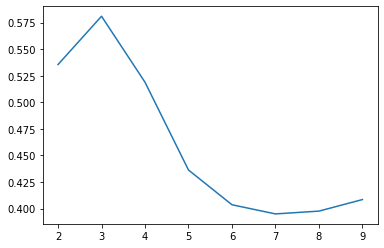

In [ ]:
# 1. Silhouette
ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(scaled_df_iris)
    ss.append([k, silhouette_score(scaled_df_iris, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()

In [ ]:
# Silhouette score
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df_iris)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df_iris, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5355115736215805
For n_clusters=3, the silhouette score is 0.5809292741049061
For n_clusters=4, the silhouette score is 0.5169729955093286
For n_clusters=5, the silhouette score is 0.4362673951351479
For n_clusters=6, the silhouette score is 0.4037831788880716
For n_clusters=7, the silhouette score is 0.4002176208129911
For n_clusters=8, the silhouette score is 0.4021127247515203


#### Here the first joint appears at 3 so we can select K as 3. Also by the score we can see for this dataset 3 clusters has maximum silhouette score.

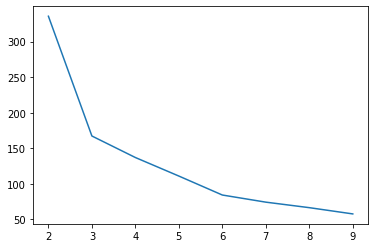

In [ ]:
# 2. Elbow curve
ssd = []
for k in range(2, 10):
    model= KMeans(n_clusters = k).fit(scaled_df_iris)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.show()

#### The above curve shows elbow at 3. So selecting K as 3

In [ ]:
# final model with k=3

kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(scaled_df_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
df_iris_copy.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# We will add the K-means clustered labels to the copied dataframe
df_iris_Klabelled = pd.concat([df_iris_copy, pd.Series(kmean.labels_)], axis =1)

In [ ]:
df_iris_Klabelled

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,0
0,1,5.1,3.500,1.4,0.2,Iris-setosa,0
1,2,4.9,3.000,1.4,0.2,Iris-setosa,0
2,3,4.7,3.200,1.3,0.2,Iris-setosa,0
3,4,4.6,3.100,1.5,0.2,Iris-setosa,0
4,5,5.0,3.600,1.4,0.2,Iris-setosa,0
5,6,5.4,3.900,1.7,0.4,Iris-setosa,0
6,7,4.6,3.400,1.4,0.3,Iris-setosa,0
7,8,5.0,3.400,1.5,0.2,Iris-setosa,0
8,9,4.4,2.900,1.4,0.2,Iris-setosa,0
9,10,4.9,3.100,1.5,0.1,Iris-setosa,0


In [ ]:
# renaming the label column
df_iris_Klabelled.rename(columns={0:'Cluster_Labels'}, inplace=True)

In [ ]:
# check whether it got renamed properly
df_iris_Klabelled

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_Labels,Cluster_Labels_Hier
0,1,5.1,3.500,1.4,0.2,Iris-setosa,0,2
1,2,4.9,3.000,1.4,0.2,Iris-setosa,0,5
2,3,4.7,3.200,1.3,0.2,Iris-setosa,0,5
3,4,4.6,3.100,1.5,0.2,Iris-setosa,0,5
4,5,5.0,3.600,1.4,0.2,Iris-setosa,0,2
5,6,5.4,3.900,1.7,0.4,Iris-setosa,0,6
6,7,4.6,3.400,1.4,0.3,Iris-setosa,0,2
7,8,5.0,3.400,1.5,0.2,Iris-setosa,0,2
8,9,4.4,2.900,1.4,0.2,Iris-setosa,0,5
9,10,4.9,3.100,1.5,0.1,Iris-setosa,0,5


In [ ]:
# By tallying the Cluster Labels column with Species we can come to the following conclusions:
# The cluster label 0 belongs to Iris-setosa
# The cluster label 1 belongs to Iris-virginica
# The cluster label 2 belongs to Iris-versicolor

In [ ]:
df_iris_Klabelled.Cluster_Labels.value_counts()

2    50
1    50
0    50
Name: Cluster_Labels, dtype: int64

# **Visualisation**

### Visualisation using the variables which have higher clustering tendency viz. PetalLengthCm and PetalWidthCm

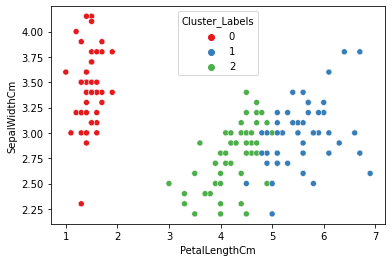

In [ ]:
sns.scatterplot(x = "PetalLengthCm" , y = "SepalWidthCm", hue = 'Cluster_Labels', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalWidthCm")
plt.show()

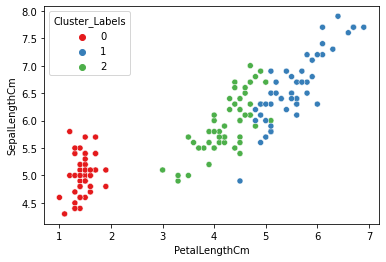

In [ ]:
sns.scatterplot(x = "PetalLengthCm" , y = "SepalLengthCm", hue = 'Cluster_Labels', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalLengthCm")
plt.show()

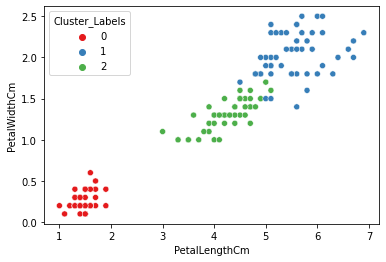

In [ ]:
sns.scatterplot(x = "PetalLengthCm" , y = "PetalWidthCm", hue = 'Cluster_Labels', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.show()

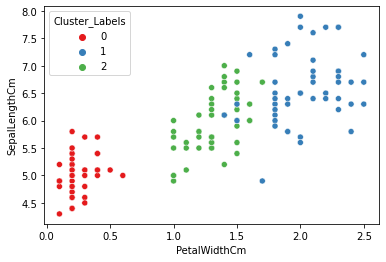

In [ ]:
# SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	Species
sns.scatterplot(x = "PetalWidthCm" , y = "SepalLengthCm", hue = 'Cluster_Labels', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show()

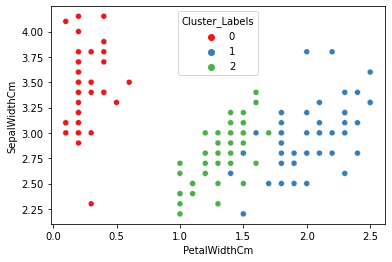

In [ ]:
sns.scatterplot(x = "PetalWidthCm" , y = "SepalWidthCm", hue = 'Cluster_Labels', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalWidthCm")
plt.show()

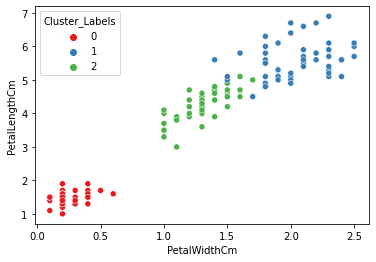

In [ ]:
sns.scatterplot(x = "PetalWidthCm" , y = "PetalLengthCm", hue = 'Cluster_Labels', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalWidthCm")
plt.ylabel("PetalLengthCm")
plt.show()    

## B) Hierarchical clustering
#### We will use 2 methods:
- Single Linkage Clustering Method
- Hierarchical Clustering Method

In [ ]:
# Inspecting the scaled data
scaled_df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.054478,-1.341272,-1.312977,-0.707107
1,-1.143017,-0.125943,-1.341272,-1.312977,-0.707107
2,-1.385353,0.346225,-1.398138,-1.312977,-0.707107
3,-1.506521,0.110141,-1.284407,-1.312977,-0.707107
4,-1.021849,1.290562,-1.341272,-1.312977,-0.707107


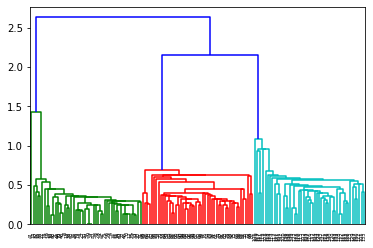

In [ ]:
# single linkage
mergings = linkage(scaled_df_iris, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# assign cluster labels
df_iris_Klabelled['Cluster_Labels_Hier'] = cluster_labels
df_iris_Klabelled

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_Labels,Cluster_Labels_Hier
0,1,5.1,3.500,1.4,0.2,Iris-setosa,0,2
1,2,4.9,3.000,1.4,0.2,Iris-setosa,0,5
2,3,4.7,3.200,1.3,0.2,Iris-setosa,0,5
3,4,4.6,3.100,1.5,0.2,Iris-setosa,0,5
4,5,5.0,3.600,1.4,0.2,Iris-setosa,0,2
5,6,5.4,3.900,1.7,0.4,Iris-setosa,0,6
6,7,4.6,3.400,1.4,0.3,Iris-setosa,0,2
7,8,5.0,3.400,1.5,0.2,Iris-setosa,0,2
8,9,4.4,2.900,1.4,0.2,Iris-setosa,0,5
9,10,4.9,3.100,1.5,0.1,Iris-setosa,0,5


In [ ]:
df_iris_Klabelled.Cluster_Labels_Hier.value_counts()

2    50
1    50
0    50
Name: Cluster_Labels_Hier, dtype: int64

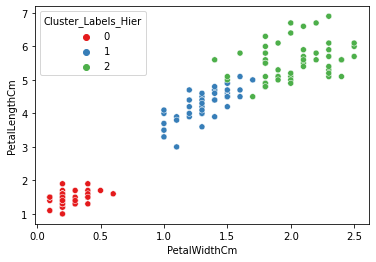

In [ ]:
sns.scatterplot(x = "PetalWidthCm" , y = "PetalLengthCm", hue = 'Cluster_Labels_Hier', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalWidthCm")
plt.ylabel("PetalLengthCm")
plt.show() 

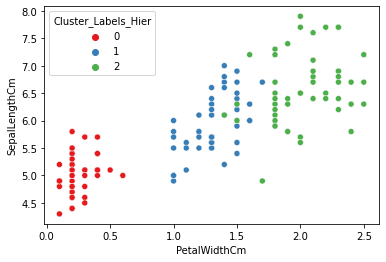

In [ ]:
sns.scatterplot(x = "PetalWidthCm" , y = "SepalLengthCm", hue = 'Cluster_Labels_Hier', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLengthCm")
plt.show() 

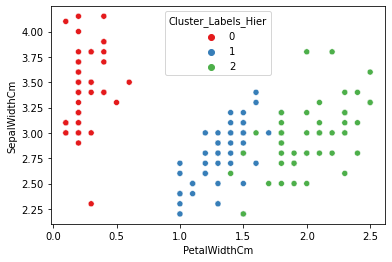

In [ ]:
sns.scatterplot(x = "PetalWidthCm" , y = "SepalWidthCm", hue = 'Cluster_Labels_Hier', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalWidthCm")
plt.show() 

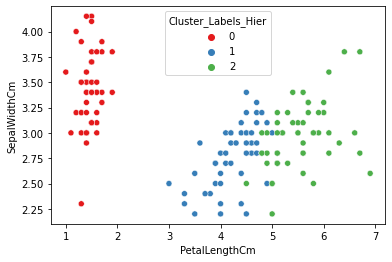

In [ ]:
sns.scatterplot(x = "PetalLengthCm" , y = "SepalWidthCm", hue = 'Cluster_Labels_Hier', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalWidthCm")
plt.show()

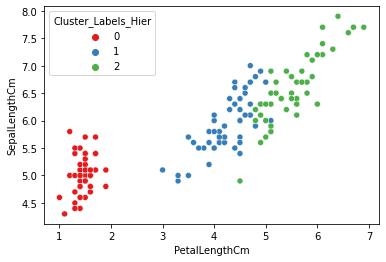

In [ ]:
sns.scatterplot(x = "PetalLengthCm" , y = "SepalLengthCm", hue = 'Cluster_Labels_Hier', data = df_iris_Klabelled, palette = "Set1")
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalLengthCm")
plt.show()

In [ ]:
# By tallying the Cluster Labels column with Species we can come to the following conclusions:
# The cluster label 0 belongs to Iris-setosa
# The cluster label 1 belongs to Iris-virginica
# The cluster label 2 belongs to Iris-versicolor

# **Conclusion:**

1) Hence from both the clustering algorithms viz. K-Means Clustering and Hierarchichal Clustering we get same number of optimum clusters i.e 3.

2) Also from the histogram graphs we can see that the variables PetalWidthCm and PetalLengthCm have good clustering tendencies.

3) Following are the results of prediction obtained by clustering:

* Flowers with petal length 1 to 2 cm and sepal width 2.25 to 5 Cm are Iris-setosa
* Flowers with petal length 3 to 5 cm and sepal width 2.13 to 3.44 cm are Iris-virginica
* Flowers with petal length 4.5 to 7 cm and sepal width 2.13 to 3.81 cm are Iris-versicolor

* Flowers with petal length 1 to 2 cm and sepal length 4 to 6 Cm are Iris-setosa
* Flowers with petal length 3 to 5 cm and sepal length 4.8 to 7 cm are Iris-virginica
* Flowers with petal length 4.5 to 7 cm and sepal length 4.7 to 7.8 cm are Iris-versicolor

* Flowers with petal length 1 to 2 cm and petal width 0 to 0.6 Cm are Iris-setosa
* Flowers with petal length 3 to 5 cm and petal width 0.8 to 1.7 cm are Iris-versicolor
* Flowers with petal length 4.4 to 7 cm and petal width 1.4 to 2.5 cm are Iris-virginica

* Flowers with petal width 0.1 to 0.6 cm and sepal length 0 to 5.7 Cm are Iris-setosa
* Flowers with petal width 1 to 1.7 cm and sepal length 4.7 to 7.1 cm are Iris-versicolor
* Flowers with petal width 1.4 to 2.5 cm and sepal length 4.7 to 7.9 cm are Iris-virginica

* Flowers with petal width 0.1 to 0.6 cm and sepal width 2.35 to 5 Cm are Iris-setosa
* Flowers with petal width 1 to 1.7 cm and sepal width 2.25 to 3.26 cm are Iris-versicolor
* Flowers with petal width 1.4 to 2.5 cm and sepal width 2.25 to 3.75 cm are Iris-virginica